In [73]:
# Dependencies
import os
import csv
import json
import time
import requests
import pandas as pd
import numpy as np
import scipy.stats as sts
from pprint import pprint
from config import api_key
from citipy import citipy
import matplotlib.pyplot as plt

output_dir = os.path.join("Images","")

In [41]:
## Create latitudes and cities lists variables and initialize them as empty lists
cities = []
# Generate a list of cities using a random function up to 1500 in size for scanning
# Note: larger number of cities can be obtained with larger size, however for this task only about 500 are required
latitude = np.random.uniform(low=-90.000, high=90.000, size=2000)
longitude = np.random.uniform(low=-180.000, high=180.000, size=2000)

latitudes_longitudes = zip(latitude, longitude)
count_cities_500 = 0
for latitude_longitude in latitudes_longitudes:
    city = citipy.nearest_city(latitude_longitude[0], latitude_longitude[1]).city_name
    # If city is not in cities, then append the city to the cities' list. Limit the city list to 500
    if city not in cities:
        if count_cities_500 < 500:
            cities.append(city)
            count_cities_500 += 1
        else:
            break
    else:
        continue
print(f"First five are listed here: {cities[:5]}...")
print(f"There are {len(cities)} cities in the list.")

First five are listed here: ['mys shmidta', 'nikolskoye', 'kaitangata', 'karakose', 'arraial do cabo']...
There are 500 cities in the list.


In [50]:
# url for weather api
units = 'english'
url   = "http://api.openweathermap.org/data/2.5/weather?q="
url2  = "http://api.openweathermap.org/data/2.5/group?id=524901,703448,2643743&units=metric"
city_5_list = cities[:5]
city_list   = []
temp_list   = []
lat_list    = []
long_list   = []
humid_list  = []
cloud_list  = []
wind_list   = []
counter     = 0

for city in cities:
    try:
        if counter < 49:
            query_test_url = f"http://api.openweathermap.org/data/2.5/weather?q={city}&appid={api_key}"
            #print(query_test_url)
            response = requests.get(query_test_url).json()
            #print(response)
            city_list.append(response["name"])
            temp_list.append(response["main"]["temp"])
            lat_list.append(response["coord"]["lat"])
            long_list.append(response["coord"]["lon"])
            humid_list.append(response["main"]["humidity"])
            cloud_list.append(response["clouds"]["all"])
            wind_list.append(response["wind"]["speed"])
            counter = counter + 1
        else:
            counter = 0
            print(f"Reset counter")
            continue
#         if counter > 50:
#             counter = 1
#         else:
#             counter += 1
    except KeyError:
        print(f"City '{city.capitalize()}' was not found.")
print(wnd_list)

City 'Mys shmidta' was not found.
City 'Karakose' was not found.
City 'Ust-kamchatsk' was not found.
City 'Attawapiskat' was not found.
City 'Nizhneyansk' was not found.
City 'Taolanaro' was not found.
City 'Khomeynishahr' was not found.
City 'Illoqqortoormiut' was not found.
Reset counter
City 'Marcona' was not found.
City 'Tumannyy' was not found.
City 'Belushya guba' was not found.
Reset counter
City 'Shchelyayur' was not found.
City 'Toliary' was not found.
City 'Tabiauea' was not found.
City 'Kapustin yar-1' was not found.
City 'Barentsburg' was not found.
Reset counter
City 'Amderma' was not found.
City 'Jabiru' was not found.
City 'Tabialan' was not found.
City 'Karauzyak' was not found.
City 'Ciras' was not found.
Reset counter
City 'Solsvik' was not found.
City 'Halalo' was not found.
City 'Talawdi' was not found.
City 'Duz' was not found.
City 'Sentyabrskiy' was not found.
City 'Xiangdong' was not found.
Reset counter
City 'Palabuhanratu' was not found.
City 'Tuggurt' was not

In [91]:
# Create a dataframe from the collected data
weather_df = pd.DataFrame({'City': city_list,
                           'Temperature (DegF)': temp_list,
                           'Cloudiness(%)': cloud_list,
                           'Latitude': lat_list,
                           'Longitude': long_list,
                           'Wind Speed (mps)': wind_list})
weather_df.head()

,City,Temperature (DegF),Cloudiness(%),Latitude,Longitude,Wind Speed (mps)
0,Nikolskoye,289.58,0,59.70,30.79,2.00
1,Kaitangata,282.59,2,-46.28,169.85,0.43
2,Arraial do Cabo,296.40,45,-22.97,-42.03,3.76
3,Upernavik,272.29,4,72.79,-56.15,5.58
4,Walvis Bay,293.91,0,-22.96,14.51,11.30


In [92]:
northern_weather_df = weather_df.loc[weather_df['Latitude'] >= 0]
northern_weather_df.head()

,City,Temperature (DegF),Cloudiness(%),Latitude,Longitude,Wind Speed (mps)
0,Nikolskoye,289.58,0,59.70,30.79,2.00
3,Upernavik,272.29,4,72.79,-56.15,5.58
7,Abū Zabad,301.57,29,12.35,29.25,5.67
11,Barrow,279.15,1,71.29,-156.79,2.10
12,Nishihara,304.54,20,26.18,127.76,6.70


In [93]:
southern_weather_df = weather_df.loc[weather_df['Longitude'] < 0]
southern_weather_df.head()

,City,Temperature (DegF),Cloudiness(%),Latitude,Longitude,Wind Speed (mps)
2,Arraial do Cabo,296.40,45,-22.97,-42.03,3.76
3,Upernavik,272.29,4,72.79,-56.15,5.58
6,Coquimbo,283.15,0,-29.95,-71.34,4.10
10,Punta Arenas,273.15,69,-53.15,-70.92,5.10
11,Barrow,279.15,1,71.29,-156.79,2.10


In [94]:
# Extract column data to use for a scatter plot
temp_north = northern_weather_df['Temperature (DegF)']
print(temp_north[:5])

0     289.58
3     272.29
7     301.57
11    279.15
12    304.54
Name: Temperature (DegF), dtype: float64


In [95]:
lat_north = northern_weather_df['Latitude']
lat_north[:5]

0     59.70
3     72.79
7     12.35
11    71.29
12    26.18
Name: Latitude, dtype: float64

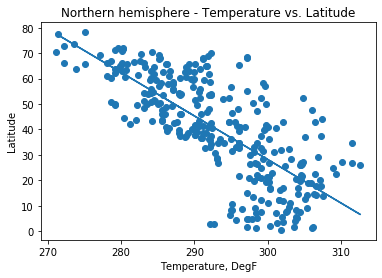

Pearson's correlation for the southern hemisphere is -0.74


In [96]:
plt.scatter(temp_north, lat_north)
plt.title("Northern hemisphere - Temperature vs. Latitude")
plt.xlabel("Temperature, DegF")
plt.ylabel("Latitude")
m, b = np.polyfit(temp_north, lat_north, 1)
plt.plot(temp_north, m*temp_north + b)
plt.show()
# Identify Pearson value
print(f"Pearson's correlation for the southern hemisphere is {round(sts.pearsonr(temp_north, lat_north)[0],2)}")

In [101]:
temp_south = southern_weather_df['Temperature (DegF)']
print(temp_south[:5])

2     296.40
3     272.29
6     283.15
10    273.15
11    279.15
Name: Temperature (DegF), dtype: float64


In [104]:
lat_south = southern_weather_df['Latitude']
print(lat_south[:5])

2    -22.97
3     72.79
6    -29.95
10   -53.15
11    71.29
Name: Latitude, dtype: float64


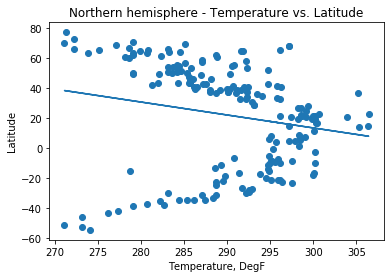

In [105]:
plt.scatter(temp_south, lat_south)
plt.title("Southern hemisphere - Temperature vs. Latitude")
plt.xlabel("Temperature, DegF")
plt.ylabel("Latitude")
n, c = np.polyfit(temp_south, lat_south, 1)
plt.plot(temp_south, n*temp_south + c)
plt.show()
# Identify Pearson value
#print(f"Pearson's correlation for the Southern hemisphere is {round(sts.pearsonr(temp_south, lat_south)[0],2)}")

2     296.40
3     272.29
6     283.15
10    273.15
11    279.15
Name: Temperature (DegF), dtype: float64
